In [1]:
import warnings
!pip install pmdarima
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00


In [2]:
df = pd.read_csv(r'/content/BTC-01.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close
0,01-01-2019,3746.713379,3850.913818,3707.231201,3843.520020
1,02-01-2019,3849.216309,3947.981201,3817.409424,3943.409424
2,03-01-2019,3931.048584,3935.685059,3826.222900,3836.741211
3,04-01-2019,3832.040039,3865.934570,3783.853760,3857.717529
4,05-01-2019,3851.973877,3904.903076,3836.900146,3845.194580
5,06-01-2019,3836.519043,4093.297363,3826.513184,4076.632568
6,07-01-2019,4078.584961,4092.613525,4020.894043,4025.248291
7,08-01-2019,4028.472168,4109.020996,3996.955322,4030.847900
8,09-01-2019,4031.552002,4068.403564,4022.662842,4035.296387
9,10-01-2019,4034.411377,4064.066650,3659.174561,3678.924561


In [4]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [6]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.113012
p-value                           0.709855
No Lags Used                     14.000000
Number of Observations Used    1929.000000
Critical Value (1%)              -3.433745
Critical Value (5%)              -2.863039
Critical Value (10%)             -2.567568
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [7]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

 Fitting SARIMA for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32183.439, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32184.803, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32181.583, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32181.775, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32184.778, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32183.171, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32184.131, Time=1.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=32181.775, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.539 seconds
Model summary for  m = 1
----------------------------------------------------------------------------------------------------
Evaluation metric results:-
MSE is : 30449371.13828029
MSE is : 4663.5722067939
RMSE is : 5518.094883044355
MAPE is : 7.1991009703395035
R2 is : -2.7689193184294414



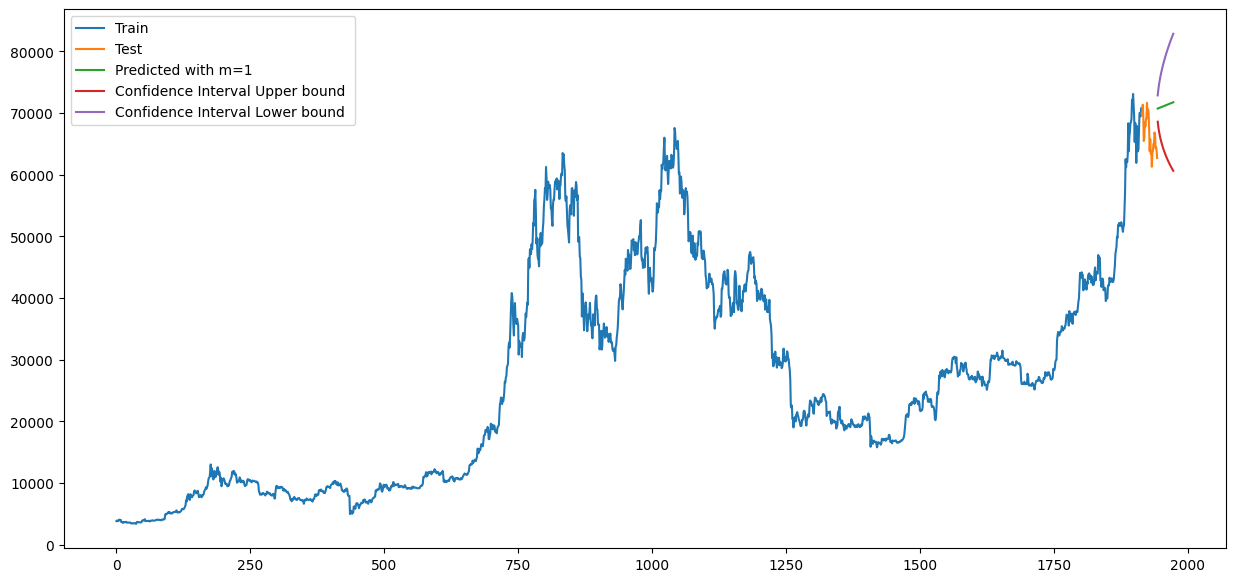

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


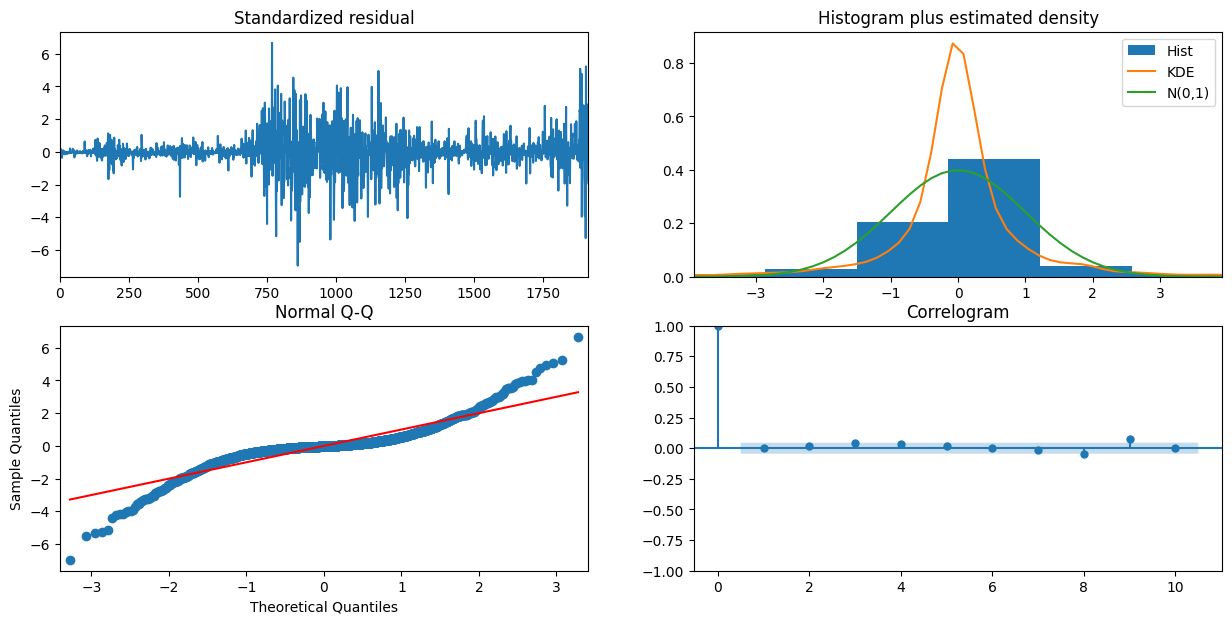

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=32184.119, Time=1.78 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=32184.803, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=32181.439, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=32181.413, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=32184.778, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=32181.775, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=32182.340, Time=1.04 sec
 ARIMA(0,1,1)(0,0,2)[4] intercept   : AIC=32179.385, Time=0.66 sec
 ARIMA(0,1,1)(1,0,2)[4] intercept   : AIC=32180.090, Time=2.07 sec
 ARIMA(0,1,1)(0,0,3)[4] intercept   : AIC=32177.688, Time=1.91 sec
 ARIMA(0,1,1)(1,0,3)[4] intercept   : AIC=32179.665, Time=3.54 sec
 ARIMA(0,1,1)(0,0,4)[4] intercept   : AIC=32179.657, Time=1.76 sec
 ARIMA(0,1,

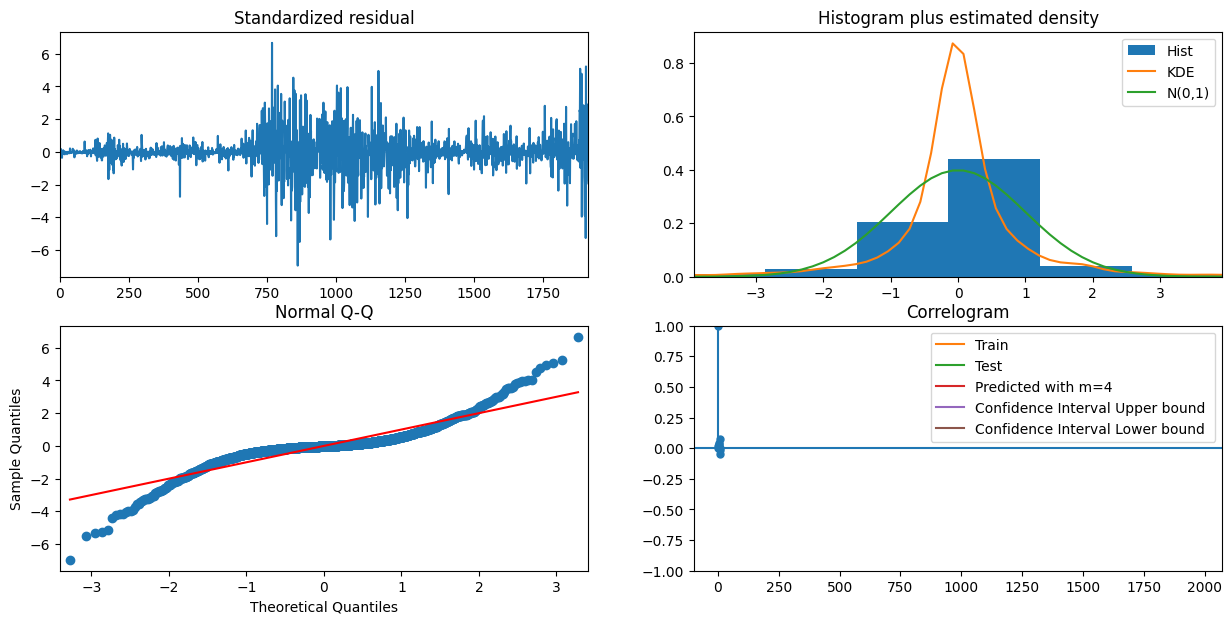

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


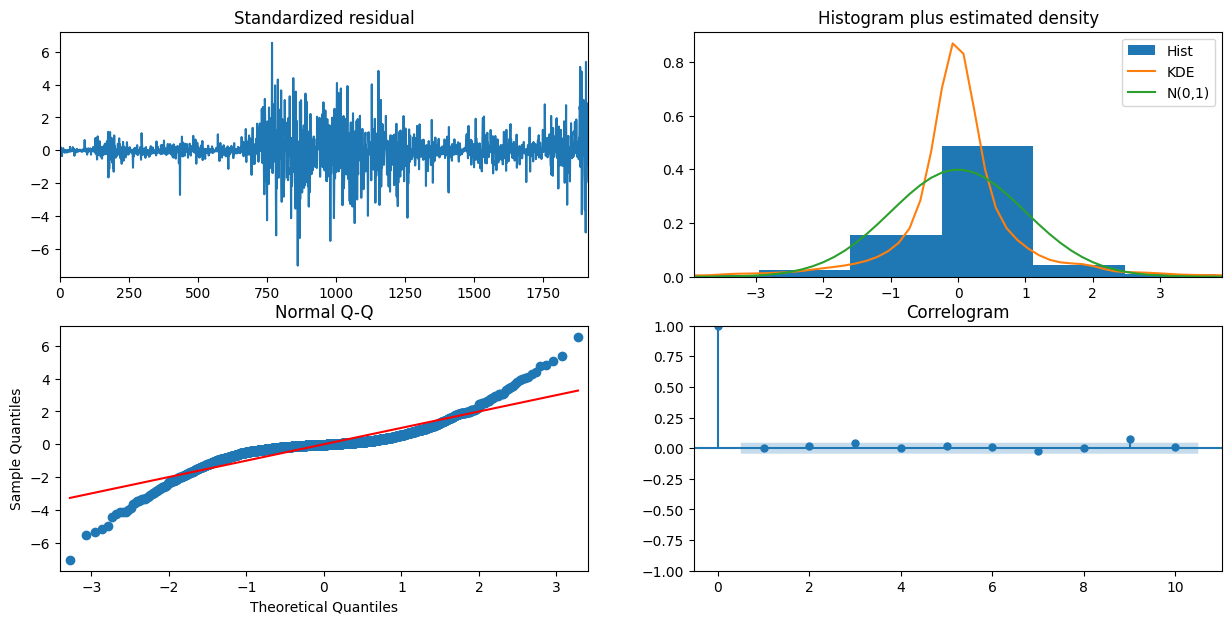

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=32184.176, Time=4.85 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=32184.803, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=32182.964, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=32183.208, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=32184.778, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=32181.583, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=32182.992, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=32182.263, Time=2.28 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=32183.171, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=32183.439, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=32181.775, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=32184.131, Time=1.02 sec
 ARIMA(1,1,

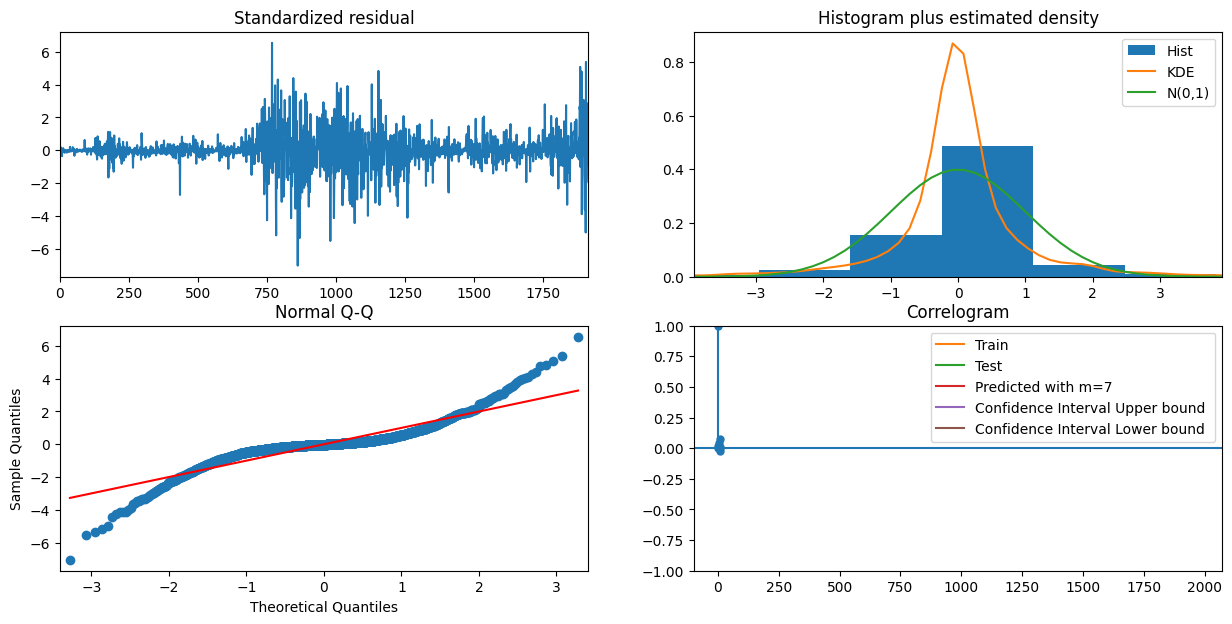

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


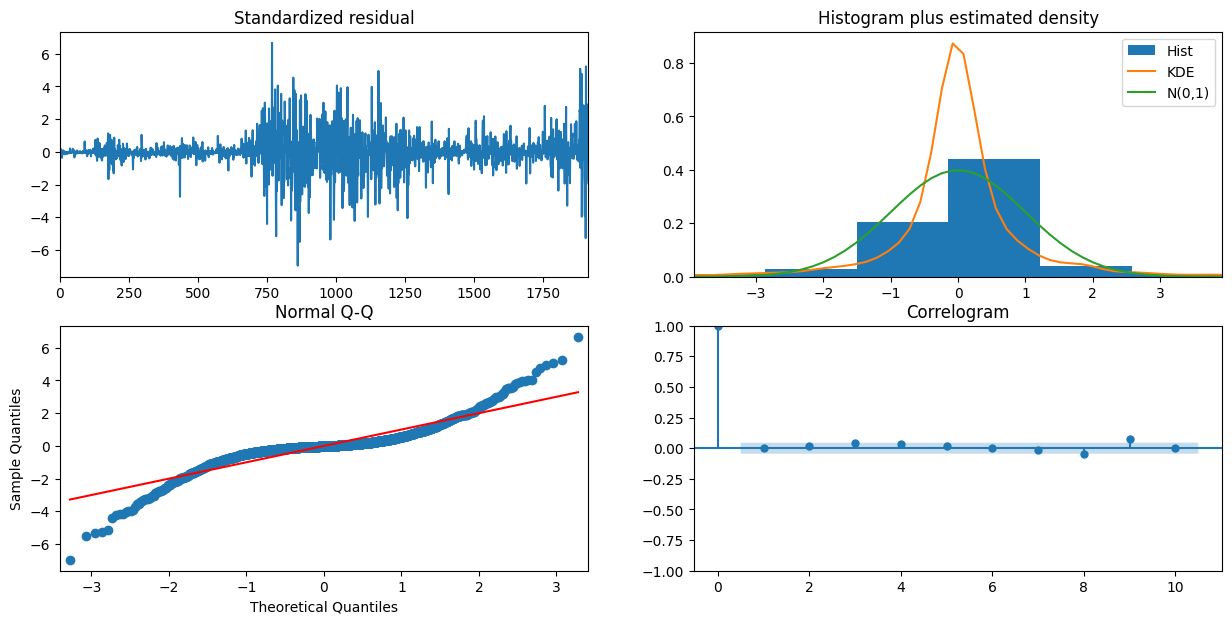

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 12
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=32171.959, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=32184.803, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=32179.059, Time=0.86 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=32179.750, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=32184.778, Time=0.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=32181.387, Time=4.23 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=32180.917, Time=2.46 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=32170.809, Time=5.51 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32175.595, Time=7.22 sec
 ARIMA(1,1,1)(3,0,1)[12] intercept   : AIC=32171.088, Time=14.40 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=26.72 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=32170.529, Time=6.78 sec
 A

In [ ]:
for m in  [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(train, start_p=1, start_q=1,
                                max_p=7, max_q=7, seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast ,conf_int= stepwise_model.predict(n_periods=30,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1944, 1974)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1944, 1974)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(test, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(train, label='Train ')
    plt.plot(test, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')

    display(stepwise_model.plot_diagnostics());

    print("-"*100)